As a first step, we have to import packages, needed for data analysis.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

We got our packages imported, now we want to take a look at our data and inspect them.

In [48]:
raw_data = pd.read_csv('data/netflix_titles.csv')


raw_data.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

From .info, we see that we have dataset of size 8807 x 12, which contains NaN values. We want to deep diver and inspect their distribution, to choose optimal way of processing them. 

In [49]:
raw_data.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [50]:
raw_data.duplicated().value_counts()

False    8807
dtype: int64

We handle the NaNs in column 'director' by finding collaboration of director with cast. Then filling directors when they are missing by looking in the cast column and find  whether there is a match witch their most collaborating actors.

In [51]:
collaborations = {}


for index, row in raw_data.iterrows():
    cast = row['cast']
    director = row['director']
    
    
    if pd.notnull(director):
        continue
    
    
    if pd.notnull(cast):
        actors = cast.split(', ')
        
        
        for actor in actors:
            if actor in collaborations:
                collaborations[actor] += 1
            else:
                collaborations[actor] = 1


for index, row in raw_data.iterrows():
    cast = row['cast']
    director = row['director']
    
    
    if pd.isnull(director):
        if pd.notnull(cast):
            actors = cast.split(', ')
            max_collaborations = 0
            most_collaborated_actor = None
            
            
            for actor in actors:
                if actor in collaborations and collaborations[actor] > max_collaborations:
                    max_collaborations = collaborations[actor]
                    most_collaborated_actor = actor
            
            
            raw_data.at[index, 'director'] = most_collaborated_actor


We create a dictionary with countries and their respective continent. We use the dictionary to assign continent to their countries in new column continent. In the end we handle rows that have unknown country with simple fill of unknown continent and at last for rows that have multiple countries we asign them international status.

In [52]:
continent_map = {
    'Albania': 'Europe',
    'Andorra': 'Europe',
    'Armenia': 'Europe',
    'Austria': 'Europe',
    'Azerbaijan': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Kazakhstan': 'Europe',
    'Kosovo': 'Europe',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'Vatican City': 'Europe',
    'Afghanistan': 'Asia',
    'Armenia': 'Asia',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'Brunei': 'Asia',
    'Cambodia': 'Asia',
    'China': 'Asia',
    'Cyprus': 'Asia',
    'Georgia': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Israel': 'Asia',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Lebanon': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'North Korea': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palestine': 'Asia',
    'Philippines': 'Asia',
    'Qatar': 'Asia',
    'Russia': 'Asia',
    'Saudi Arabia': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Sri Lanka': 'Asia',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia',
    'Uzbekistan': 'Asia',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cameroon': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Comoros': 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Republic of the Congo': 'Africa',
    'Djibouti': 'Africa',
    'Egypt': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Ivory Coast': 'Africa',
    'Kenya': 'Africa',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Tanzania': 'Africa',
    'Togo': 'Africa',
    'Tunisia': 'Africa',
    'Uganda': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Bahamas': 'North America',
    'Barbados': 'North America',
    'Belize': 'North America',
    'Canada': 'North America',
    'Costa Rica': 'North America',
    'Cuba': 'North America',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'El Salvador': 'North America',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Jamaica': 'North America',
    'Mexico': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America',
    'United States': 'North America',
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela': 'South America',
    'Australia': 'Australia',
}

raw_data['continent'] = raw_data['country'].map(continent_map)

raw_data[raw_data.isnull().any(axis=1)]
raw_data.loc[raw_data['country'] == 'Unknown', 'continent'] = 'Unknown'

raw_data[raw_data.isnull().any(axis=1)]
raw_data['continent'] = raw_data['continent'].fillna('International')
raw_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",North America
1,s2,TV Show,Blood & Water,Thabang Molaba,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,International
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",International
4,s5,TV Show,Kota Factory,Ahsaas Channa,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Asia


Renaming genre 'column' for better handling.

In [53]:
raw_data['genre'] = raw_data['listed_in']
raw_data = raw_data.drop('listed_in',axis=1)

Sorting cinematographic genres in two categories based on the information, if the content is TV Show or a Movie.

In the following chunk of code is created function for filtering cinematographic content by type and second function that extracts all unique genres, which is used for further filtering of the data.

In [54]:
def filter_by_type(df, content_type):
    filtered_data = df[df['type'] == content_type]
    return filtered_data

def extract_unique_column(df, genre_column):
    unique_column = set()
    for genres in df[genre_column]:
        unique_column.update(genre.strip() for genre in genres.split(','))
    return unique_column

Now we fill empty values with specfic 'Unknown' value.

In [55]:
raw_data['cast'] = raw_data['cast'].fillna('Unknown')
raw_data = raw_data.fillna('Unknown')

Here, we just change the type of cast and country informations to strings for better handling. 

In [56]:
raw_data['country'] = raw_data['country'].astype(str)
raw_data['cast'] = raw_data['cast'].astype(str)

Creating new column with decades based on the years the movies were made in. Then adding our processed data to final data file.

In [57]:
year_intervals = [
    (1971, 1980),
    (1981, 1990),
    (1991, 2000),
    (2001, 2010),
    (2011, 2020),
    (2021, 2030),
]

def assign_interval(year):
    for interval_start, interval_end in year_intervals:
        if interval_start <= year <= interval_end:
            return f'{interval_start}-{interval_end}'
    return 'Unknown'

raw_data['year_interval'] = raw_data['release_year'].apply(assign_interval)

In [58]:
raw_data.to_csv('data/proccessed_data.csv')

Making sure, that there is no other type than Movie or TV Show

In [59]:
Movie_show = raw_data['type'].unique()
Movie_show

array(['Movie', 'TV Show'], dtype=object)

Following code lets us visualize the distribution of types of contents (Movies/TV Shows)

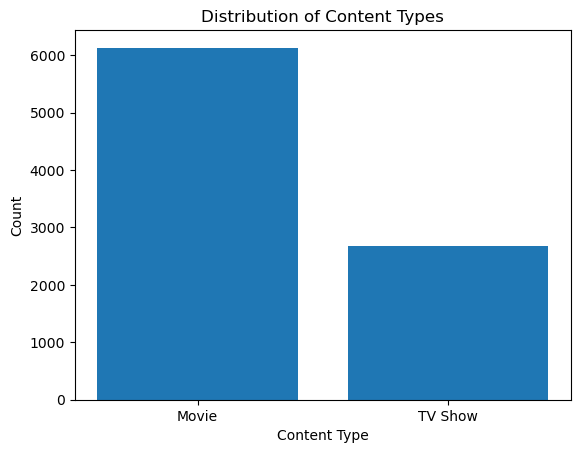

In [60]:
content_counts = raw_data['type'].value_counts()

plt.bar(content_counts.index, content_counts.values)

plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')

plt.show()

Here, we are creating a line plot that visualizes the distribution of movies and TV Shows released over different years.

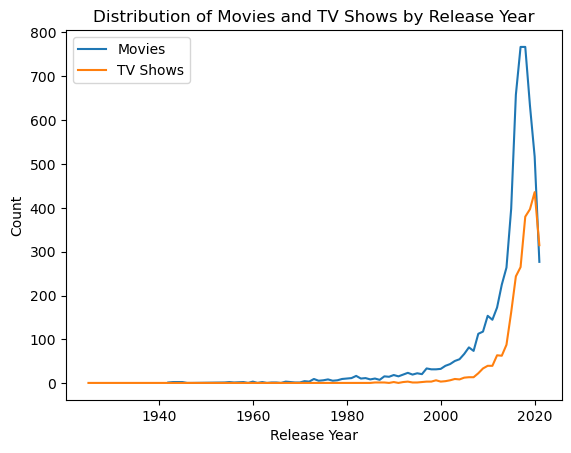

In [61]:
movies = raw_data[raw_data['type'] == 'Movie']
tv_shows = raw_data[raw_data['type'] == 'TV Show']

movie_counts = movies['release_year'].value_counts().sort_index()

tv_show_counts = tv_shows['release_year'].value_counts().sort_index()

plt.plot(movie_counts.index, movie_counts.values, label='Movies')

plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows by Release Year')

plt.legend()

plt.show()

X axis of the following plot is only from 2000 to current year, to better explain distribution of the cinematographics, as the previous graph was significantly affected by the lower count of old releases and we could not see the exact distribution in modern years.

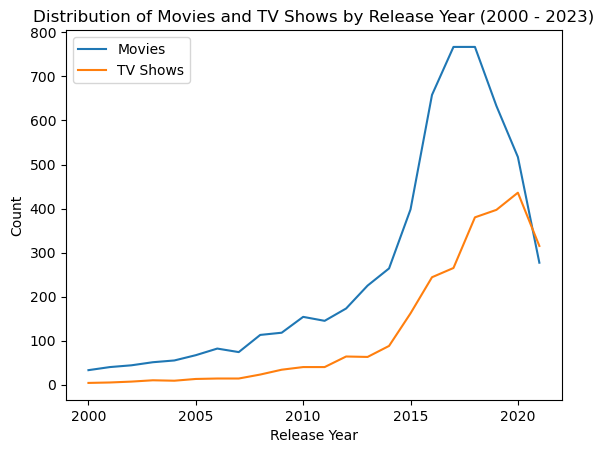

In [62]:
import datetime

current_year = datetime.datetime.now().year
filtered_df = raw_data[(raw_data['release_year'] >= 2000) & (raw_data['release_year'] <= current_year)]

movie_counts = filtered_df[filtered_df['type'] == 'Movie']['release_year'].value_counts().sort_index()

tv_show_counts = filtered_df[filtered_df['type'] == 'TV Show']['release_year'].value_counts().sort_index()

plt.plot(movie_counts.index, movie_counts.values, label='Movies')

plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows by Release Year (2000 - {})'.format(current_year))

plt.legend()

plt.show()

In the following step, we are going to use package geopandas, to show the geographic distribution of our cinematographics in a more interactive way. We could differentiate by a country, but there is a problem, as various countries could be called different names in different libraries (for example U.S. vs USA vs America,...), thus we decided to show the distribution on continents.

/var/folders/td/68d_dckd4_9d0fs13g_7wv2c0000gn/T/ipykernel_31292/2364560100.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


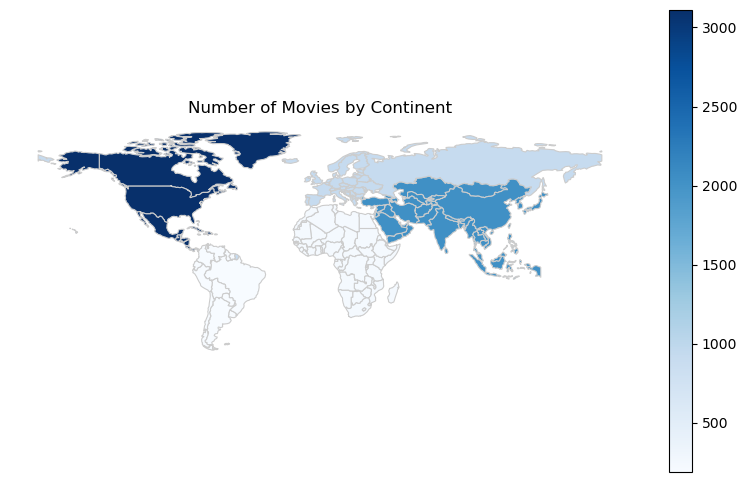

In [63]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(raw_data.groupby('continent').size().reset_index(name='movie_count'), on='continent', how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

merged_data.plot(column='movie_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Number of Movies by Continent')

ax.set_axis_off()

plt.show()

For more data visualization, we created a function that shows distribution of most casted actors.

In [64]:
def most_casted_actors(data, column, top_n=10):
    data[column] = data[column].fillna('')

    actor_counts = {}

    for row in data[column]:
        for actor in row.split(','):
            actor = actor.strip()
            if actor and actor != 'Unknown':
                if actor in actor_counts:
                    actor_counts[actor] += 1
                else:
                    actor_counts[actor] = 1

    sorted_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)

    top_n_actors = sorted_actors[:top_n]

    return top_n_actors

Here, we used it to visualize cast, but we will also use it for different categories, as genre.

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

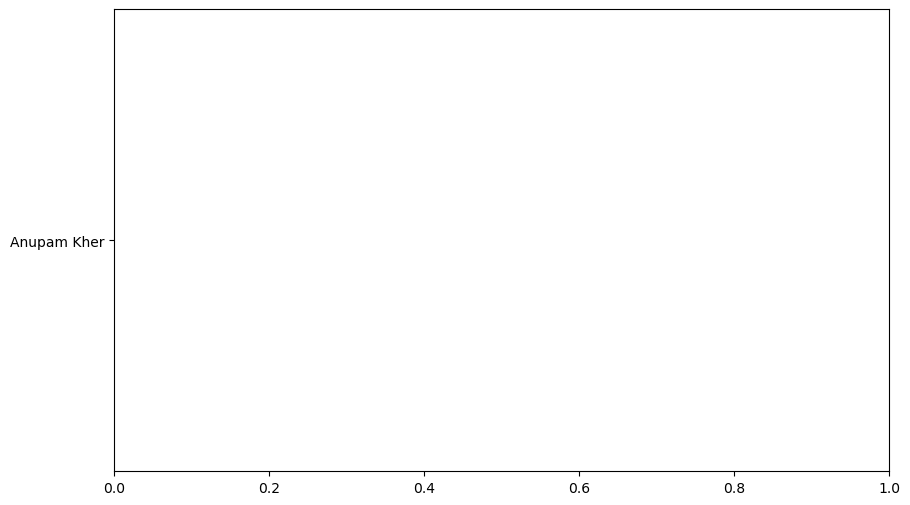

In [65]:
data = most_casted_actors(raw_data, 'cast')
categories, counts = zip(*data)

plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='007cb9')
plt.xlabel('Count')
plt.title('Top Categories on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

As we mentioned above, we use this function to filter cinematographic content by genre, here we visualize movies.

/var/folders/td/68d_dckd4_9d0fs13g_7wv2c0000gn/T/ipykernel_31292/2347048309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna("")


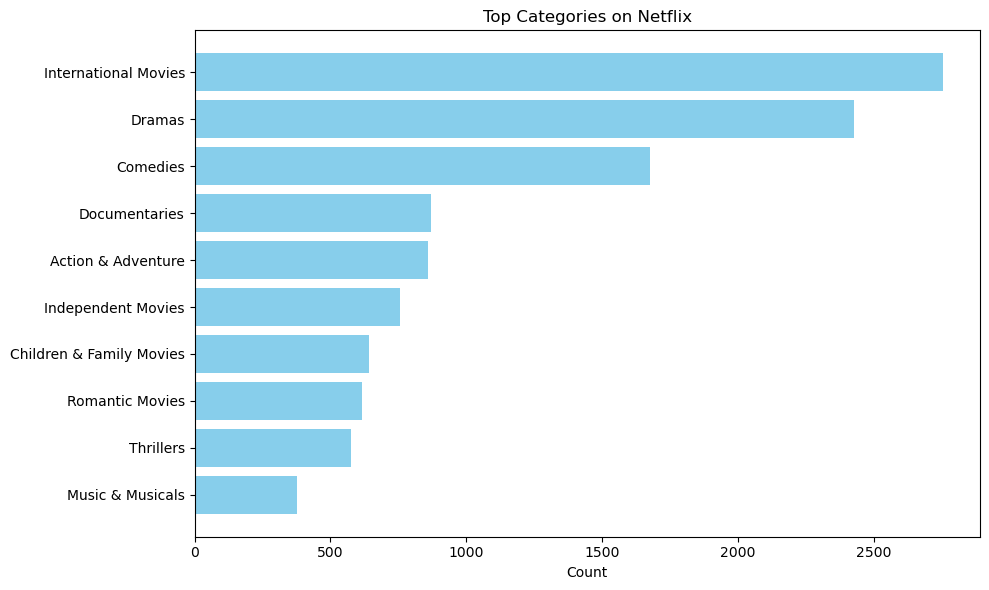

In [ ]:
data = most_casted_actors(filter_by_type(raw_data,'Movie'), 'genre')
categories, counts = zip(*data)

plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='007cb9')
plt.xlabel('Count')
plt.title('Top Categories on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In another visulaization by genre, we can see distribution of TV Shows genres.

/var/folders/td/68d_dckd4_9d0fs13g_7wv2c0000gn/T/ipykernel_31292/2347048309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna("")


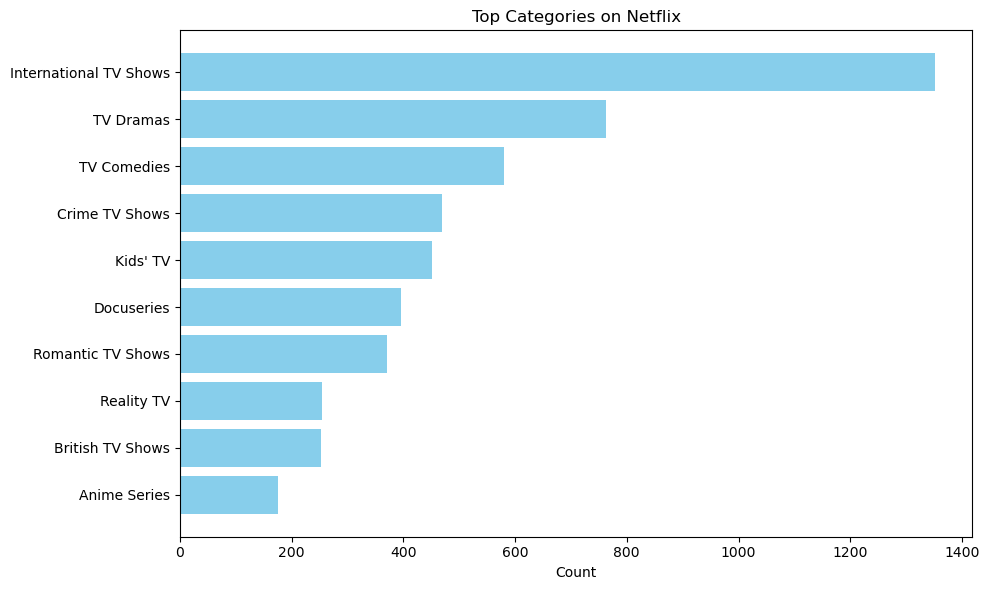

In [ ]:
data = most_casted_actors(filter_by_type(raw_data,'TV Show'), 'genre')
categories, counts = zip(*data)

plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='007cb9')
plt.xlabel('Count')
plt.title('Top Categories on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()